In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from fonctions_tests import add_manager_win_percentage_before, add_club_win_percentage_with_referee_before, add_club_scores, add_price_players, add_updated_stats_players_team_mean

data = pd.read_csv("./data/matchs_2013_2022.csv")

add_manager_win_percentage_before(data)
add_club_win_percentage_with_referee_before(data)

# je crois que les 2 sont globalement la meme chose mais au pire on pourra dire que osef et on en retirera une apres
add_club_scores(data)
add_price_players(data)

add_updated_stats_players_team_mean(data)

print(data.columns)
data.head()

d:\OneDrive\Documents\Julien\Documents\!ESILV\A3\! S6\Analyse de données\Projet\ProjetFoot\fonctions_tests.py:77: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  lineups = pd.read_csv("data\game_lineups.csv", sep=",")


Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'results',
       'home_club_manager_win_percentage_before',
       'away_club_manager_win_percentage_before',
       'home_club_win_percentage_with_referee_before',
       'away_club_win_percentage_with_referee_before', 'score_away_team',
       'score_home_team', 'transfer_home_team', 'transfer_away_team'],
      dtype='object')


,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,competition_type,results,home_club_manager_win_percentage_before,away_club_manager_win_percentage_before,home_club_win_percentage_with_referee_before,away_club_win_percentage_with_referee_before,score_away_team,score_home_team,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,domestic_league,0,0.066327,0.055556,0.000000,0.666667,81.567038,188.724000,12850.0,480.0,123.579692,118.422916,161.750455,100.956715,114.952992,115.685339,145.030063,103.672756
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,domestic_league,-1,0.070707,0.000000,0.333333,NaN,74.769105,31.855883,0.0,3700.0,117.559406,110.052019,144.110488,101.499979,115.905138,114.907099,152.706016,100.982975
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,domestic_league,-1,0.000000,0.107692,0.500000,0.250000,244.679289,23.689626,2520.0,3650.0,109.672593,110.773536,141.699589,103.487114,155.996558,129.430345,163.389242,101.314765
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,domestic_league,0,0.044776,0.059406,0.500000,0.000000,31.855883,371.824554,62100.0,0.0,145.792055,124.718132,148.306784,101.909770,117.559406,110.052019,144.110488,101.499979
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,domestic_league,1,0.000000,0.029412,0.000000,0.500000,371.824554,57.169593,0.0,62100.0,120.571681,113.389672,140.557162,102.557308,145.792055,124.718132,148.306784,101.909770


In [3]:
X = data[["attendance", "home_club_manager_win_percentage_before", "away_club_manager_win_percentage_before", "home_club_win_percentage_with_referee_before", "away_club_win_percentage_with_referee_before"]] #, "score_away_team", "score_home_team", "transfer_home_team", "transfer_away_team"]]
y = data[["results"]]
# X = data[["attendance", "home_club_manager_win_percentage", "away_club_manager_win_percentage", "home_club_win_percentage_with_referee", "away_club_win_percentage_with_referee", "score_away_team", "score_home_team", "transfer_home_team", "transfer_away_team"]] # 
X = data.drop(columns=["stadium","aggregate","attendance","competition_type","results","referee","home_club_formation","away_club_formation","home_club_name","away_club_name","Unnamed: 0", "season","round","date","home_club_manager_name","away_club_manager_name","home_club_goals", "away_club_goals","home_club_position","away_club_position"])
X.head()

attendance  home_club_manager_win_percentage_before  \
0     31952.0                                 0.066327   
1      8620.0                                 0.070707   
2     14874.0                                 0.000000   
3     13391.0                                 0.044776   
4      5981.0                                 0.000000   

   away_club_manager_win_percentage_before  \
0                                 0.055556   
1                                 0.000000   
2                                 0.107692   
3                                 0.059406   
4                                 0.029412   

   home_club_win_percentage_with_referee_before  \
0                                      0.000000   
1                                      0.333333   
2                                      0.500000   
3                                      0.500000   
4                                      0.000000   

   away_club_win_percentage_with_referee_before  
0                                      0.666667  
1                                           NaN  
2                                      0.250000  
3                                      0.000000  
4                                      0.500000

In [4]:
X.describe()

attendance  home_club_manager_win_percentage_before  \
count   3741.000000                              4078.000000   
mean   21444.918204                                 0.222700   
std    13117.601011                                 0.158622   
min      500.000000                                 0.000000   
25%    12125.000000                                 0.090909   
50%    16782.000000                                 0.210526   
75%    28324.000000                                 0.326531   
max    70785.000000                                 0.809524   

       away_club_manager_win_percentage_before  \
count                              4078.000000   
mean                                  0.145854   
std                                   0.119951   
min                                   0.000000   
25%                                   0.055556   
50%                                   0.125000   
75%                                   0.208333   
max                                   0.684211   

       home_club_win_percentage_with_referee_before  \
count                                   3491.000000   
mean                                       0.383370   
std                                        0.294634   
min                                        0.000000   
25%                                        0.166667   
50%                                        0.363636   
75%                                        0.525063   
max                                        1.000000   

       away_club_win_percentage_with_referee  score_away_team  \
count                            4078.000000      4078.000000   
mean                                0.359078       230.843606   
std                                 0.211092       175.830965   
min                                 0.000000        18.911152   
25%                                 0.222222       112.783735   
50%                                 0.333333       176.483410   
75%                                 0.500000       308.167983   
max                                 1.000000       801.536097   

       score_home_team  transfer_home_team  transfer_away_team  \
count      4078.000000         4078.000000         4078.000000   
mean        231.051570        28529.259441        28471.844041   
std         176.045400        52439.289851        52326.496043   
min          18.911152            0.000000            0.000000   
25%         112.783735         3650.000000         3650.000000   
50%         176.483410        12850.000000        12850.000000   
75%         308.167983        30200.000000        30200.000000   
max         801.536097       247000.000000       247000.000000   

       home_club_avg_goals_per_game_updated  \
count                           4078.000000   
mean                             152.089341   
std                               59.524360   
min                              108.894012   
25%                              120.571681   
50%                              132.695514   
75%                              145.792055   
max                              376.773868   

       home_club_avg_assists_per_game_updated  \
count                             4078.000000   
mean                               124.468424   
std                                 15.953681   
min                                110.052019   
25%                                115.685339   
50%                                120.246801   
75%                                125.950027   
max                                182.915104   

       home_club_avg_yellow_cards_per_game_updated  \
count                                  4078.000000   
mean                                    155.715211   
std                                       9.027656   
min                                     140.557162   
25%                                     148.306784   
50%                                     154.834746   
75%                                     162.892226   
max   

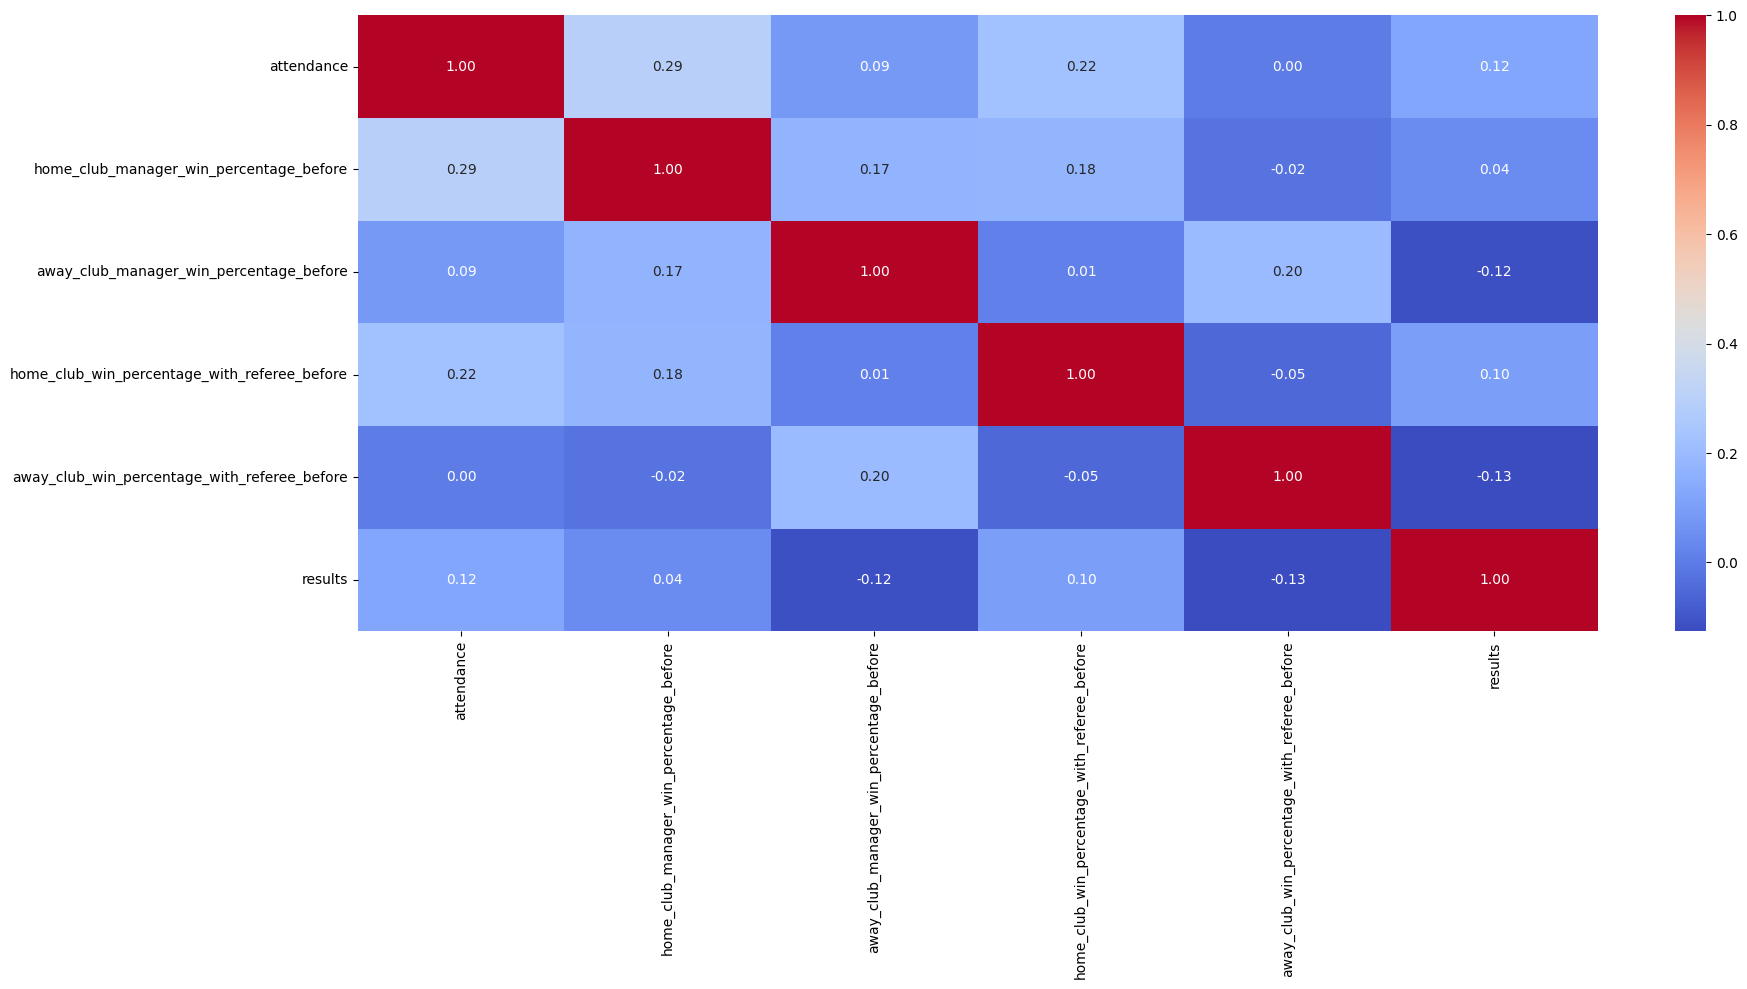

In [5]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

corr_mat = pd.DataFrame(X)
corr_mat['results'] = y
plot_correlation_matrix(corr_mat)

In [6]:
X = SimpleImputer(strategy='mean').fit_transform(X)

In [7]:
from fonctions_tests import test_data
import sklearn.discriminant_analysis as DA

accuracy = test_data(X, y, model=DA.LinearDiscriminantAnalysis())

print("Accuracy with Linear Discriminant Analysis : ", accuracy)

Accuracy with Linear Discriminant Analysis :  0.47058823529411764


## Calcul des scores de précision de différents modèles

In [8]:
# Define the names of the classifications method
names = ["LogisticRegression",
         "NBayes",
         "LDA",
         "QDA",
         "KNN",
         "SVM linear",
         "SVM rbf",
         "SVM sigmoid",
         "RandomForest",
         "DecisionTree"]

# Define the classifiers
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(),
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='linear', C=1.0),
               SVC(kernel='rbf', gamma = 1e-4),
               SVC(kernel='sigmoid', gamma = 1e-4),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Ignore warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Loop through all different classfication methods
for name, clf in zip(names, classifiers):

    accuracy = test_data(X, y, model=clf)

    print("Accuracy with ", name, " : ", round(accuracy,3))

Accuracy with  LogisticRegression  :  0.616
Accuracy with  NBayes  :  0.528
Accuracy with  LDA  :  0.61
Accuracy with  QDA  :  0.574


  File "c:\Users\lorra\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy with  KNN  :  0.474
Accuracy with  SVM linear  :  0.619
Accuracy with  SVM rbf  :  0.494
Accuracy with  SVM sigmoid  :  0.483
Accuracy with  RandomForest  :  0.571
Accuracy with  DecisionTree  :  0.5
